# **BIG BIO-DATA ANALYSIS - PRACTICE : 1**
### **SABAKAKI PETER ZIRIBAGWA** (MSC. BIOINFORMATICS)

## 1. Importing the neccessary libraries

In [1]:
### importing the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing,allows to perform data manipulation in Python
import matplotlib.pyplot as plt # used for data visualisation
import seaborn as sns # used for data visualization

#Removing the annoying warnings from our cells.
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the datasets

In [2]:
train = pd.read_csv("../input/amp-data-set/AMP_TrainSet.csv") # this is the trainning dataset
test = pd.read_csv("../input/amp-data-set/Test.csv") # this is the testing dataset

#### 3. Checking dataset content
- This helps to give a quick insight about the content of the datasete. i.e it answers the question, "What is within the datasets?"

In [3]:
train.head() # to see what is in the first 5 rows of the train dataset

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1


In [4]:
test.head() # to see what is in the first 5 rows of the test data set

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
0,4.0,3.704,0.873,73.519,0.987,-4.833,0,0.382,74.556,7.225,1.234
1,4.0,4.444,0.892,62.444,0.931,-0.584,0,0.320,56.056,4.942,1.853
2,2.0,0.000,0.901,47.000,1.039,-5.664,0,0.164,47.000,5.969,1.174
3,4.5,0.000,0.869,69.222,0.982,-5.423,0,2.010,69.222,5.462,1.138
4,-4.0,21.591,1.061,71.682,0.976,-2.002,0,2.758,66.000,5.582,1.453


## **4.Checking the dimensions of the dataset**
- it is important to know the number of columns and rows with in the dataset, because to big data set may take so long to train whereas too small dataset may reduce the performance of the model.

- to know which program to use when loading the data,forexample, pandas can't be used to load data with a big dimension

In [5]:
train.shape # to cheak the dimension i.e the number of rows and columns

(3038, 12)

`The above results show that there are 3038 rows and 12 columns.`

## **5. Checking column names of the train dataset**

In [6]:
train.columns  #checking the column names with in the train dataset 
#This gives an insight on the features available in the dataset
 

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

## **6.Checking the data type of each feature / column**
- This is important because some algorithms prefer certain data types to others. so it is good for me to first ensure the data type of my features is appropriate for the algorithm am intending to use, and if not, i should then convert the data types to the suitable ones.

In [7]:
train.dtypes # cheaking datatypes in the train dataset

FULL_Charge           float64
FULL_AcidicMolPerc    float64
FULL_AURR980107       float64
FULL_DAYM780201       float64
FULL_GEOR030101       float64
FULL_OOBM850104       float64
NT_EFC195               int64
AS_MeanAmphiMoment    float64
AS_DAYM780201         float64
AS_FUKS010112         float64
CT_RACS820104         float64
CLASS                   int64
dtype: object

## 7. Descriptive Statistics 
- This is important to understand and draw conclusions about the data in each column of the dataset.
- It enable one to describe the size, center and spread of the data in each column; i.e the count, mean, max, min, standard deviations and the percentage quartiles.

In [8]:
train.describe() # to output the statistics of each attribute in the entire dataset

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


## 8. Checking the distribution of the class
- It is important to know how balanced the frequency of the outcome categories is !. This is because imbalanced frequncies of the outcome categories may cause bias in the performance of the final model.

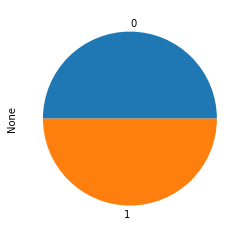

In [9]:
train.groupby('CLASS').size().plot(kind='pie') #a bar-graph is used to visualize the distribution of the values in the class atribute

 `From the above bar graph, i deduce that the "class attribute" is evenly distributed;` 
 `hence, there is no need to use methods such as smote to balance the class attribute`

## Visualization of the outcome distribution using a line graph. 

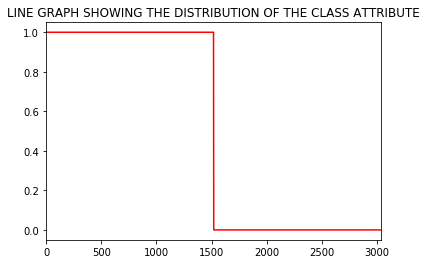

In [10]:
train["CLASS"].plot(title="LINE GRAPH SHOWING THE DISTRIBUTION OF THE CLASS ATTRIBUTE", color="red")

## **9. Determining the correlation between the all the atributes across the entire dataset**
- It is important to know how attributes are related to each other.
- Attributes which are more related to the outcome are more likely to produce a better performing model.
- For this sttuation i used the pearson correlation to know how the attributes are related to each other. 
- The bivariate Pearson correlation indicates Whether a statistically significant linear relationship exists between two continuous variables
- the correlation of -1 or 1 shows a full negative or positive correlation respectively while the value of 0 shows no correlation at all
-  it also noted that some machine learning algorithms ( linear and logistic regression) may perform poorly if there are highly correlated attributes in your dataset

In [11]:
train.corr(method='pearson') # do correlation using pearson correlation coeficient

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
FULL_Charge,1.000000,-0.612996,-0.490977,-0.434603,-0.058725,-0.283758,0.088068,0.355477,-0.365374,-0.090570,0.232929,0.534602
FULL_AcidicMolPerc,-0.612996,1.000000,0.794796,0.541481,0.115201,0.513344,-0.143168,-0.431590,0.449621,0.002334,-0.213543,-0.598816
FULL_AURR980107,-0.490977,0.794796,1.000000,0.548253,0.346139,0.462712,-0.169540,-0.426097,0.456260,0.032958,-0.403599,-0.584111
FULL_DAYM780201,-0.434603,0.541481,0.548253,1.000000,0.010118,0.334778,-0.090058,-0.408793,0.894191,0.055915,-0.326792,-0.554838
FULL_GEOR030101,-0.058725,0.115201,0.346139,0.010118,1.000000,0.319157,-0.230417,-0.160269,-0.029085,0.040480,-0.151935,-0.260470
FULL_OOBM850104,-0.283758,0.513344,0.462712,0.334778,0.319157,1.000000,-0.230561,-0.336297,0.275640,-0.452769,0.155304,-0.453287
NT_EFC195,0.088068,-0.143168,-0.169540,-0.090058,-0.230417,-0.230561,1.000000,0.178683,-0.036844,0.145924,0.080898,0.260702
AS_MeanAmphiMoment,0.355477,-0.431590,-0.426097,-0.408793,-0.160269,-0.336297,0.178683,1.000000,-0.322378,0.025580,0.171524,0.693552
AS_DAYM780201,-0.365374,0.449621,0.456260,0.894191,-0.029085,0.275640,-0.036844,-0.322378,1.000000,0.045562,-0.256060,-0.437168
AS_FUKS010112,-0.090570,0.002334,0.032958,0.055915,0.040480,-0.452769,0.145924,0.025580,0.045562,1.000000,-0.445284,0.033432


## Visualization of the correlation between attributes across the entire train dataset

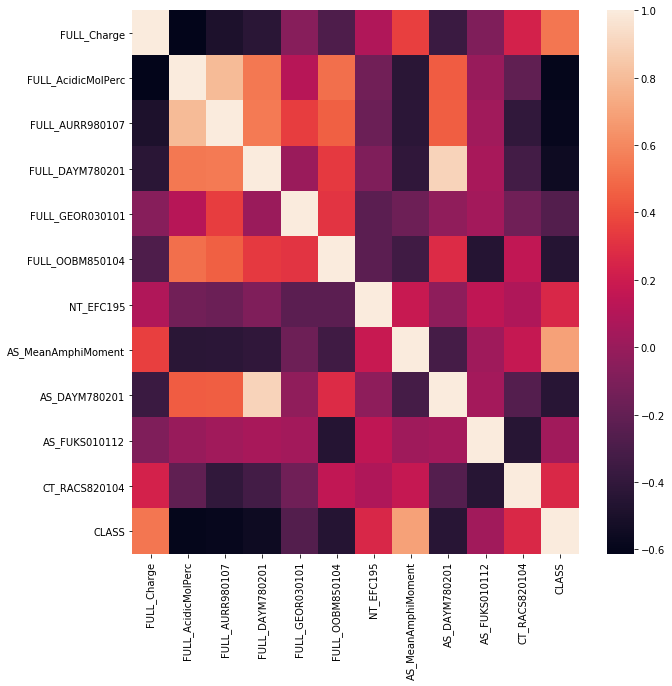

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(method='pearson')) # constract a heatmap to visually display the pearson correlation between attributes across the entire train databse



## **10.Checking the skewness of the data**
- it is important to know the skewness of the data, because some algorithm perform better with gaussian data

In [39]:
train.skew() # compute the level of skewness of each attribute in the train dataset

FULL_Charge           0.601716
FULL_AcidicMolPerc    0.994487
FULL_AURR980107       0.490291
FULL_DAYM780201      -0.216841
FULL_GEOR030101       0.883022
FULL_OOBM850104      -0.207124
NT_EFC195             2.898124
AS_MeanAmphiMoment    0.383682
AS_DAYM780201        -0.070879
AS_FUKS010112        -0.112632
CT_RACS820104         0.999487
CLASS                 0.000000
dtype: float64

### VISUALIZATION OF SKEWNESS

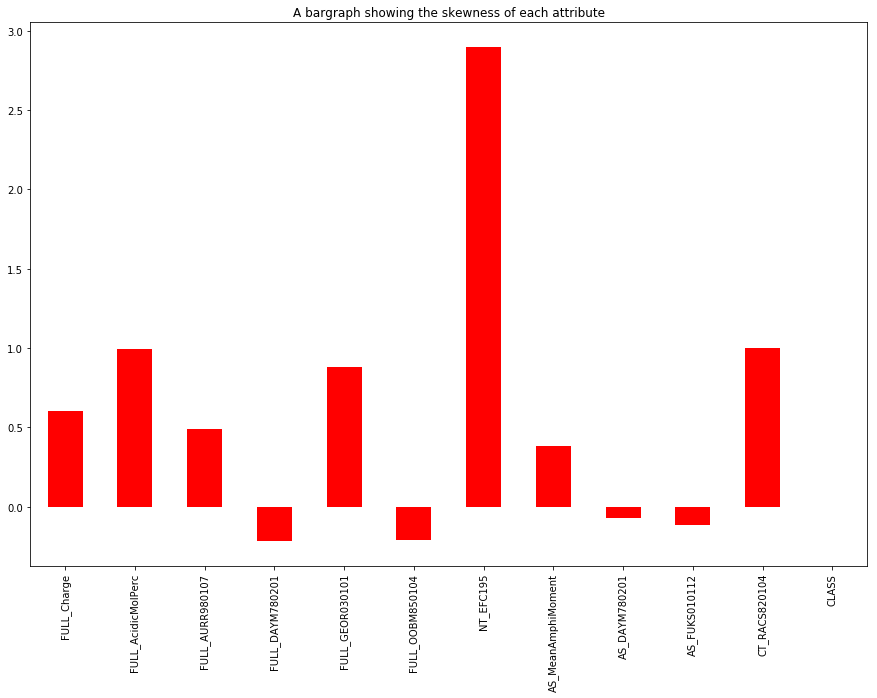

In [54]:
plt.figure(figsize=(15,10))
train.skew().plot(kind='bar', color='red', title="A bargraph showing the skewness of each attribute") # visualise the level of skewness of each attribute in the train dataset

`The graph above shows that the " NT_EFC195" attribute is highly posiively skewed. i may consider transforming
it in future`

 ## 11. Univariate data visualisation 
- it is importart to observe the distribution of each attribute independently
- it also shades a picture of the data skewness. i.e how are values spread in the entire attribute and how many are distributed around the center.
- it looks at the range of values and the central tendacy of the values.
-  Univariate data analysis also enables one to Know that an attribute has a skew. this allows one to perform data preparation to correct the skew and later improve the accuracy of your models. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61d98822e8>,
      dtype=object)

<Figure size 3600x3600 with 0 Axes>

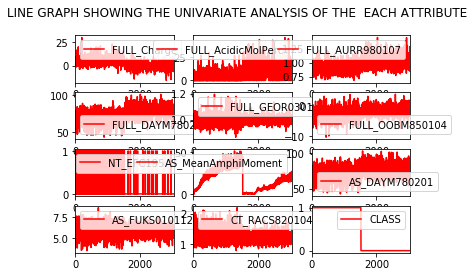

In [58]:
plt.figure(figsize=(50,50))
train.plot(title="LINE GRAPH SHOWING THE UNIVARIATE ANALYSIS OF THE  EACH ATTRIBUTE", color="red", subplots=True, layout=(4,3), sharex=False)

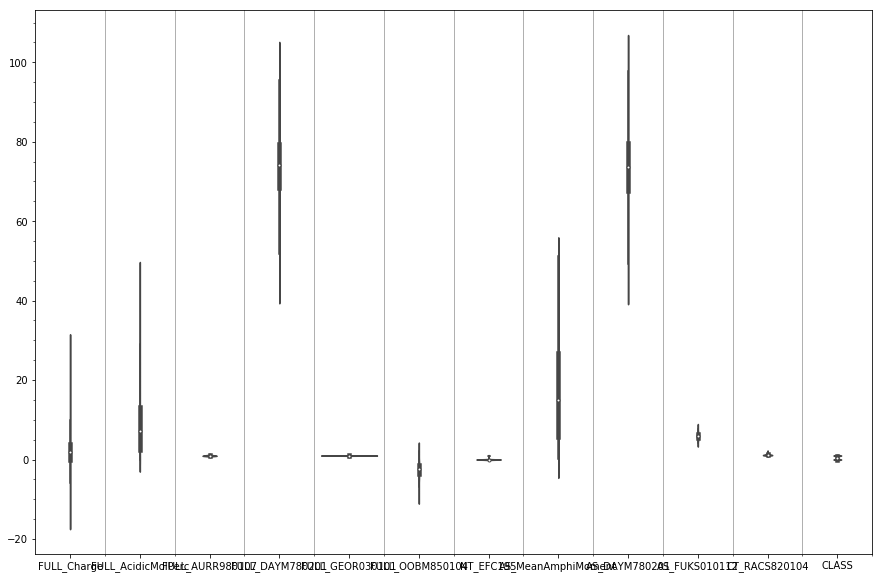

In [47]:
from matplotlib.ticker import AutoMinorLocator
fig = plt.figure(figsize=(15,10))

ax1 = sns.violinplot( data=train)
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=1)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1152x1152 with 0 Axes>

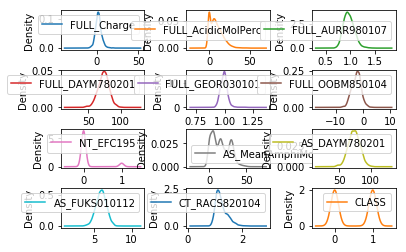

In [42]:
# Density plots
plt.figure(figsize=(16,16))
train.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show

<Figure size 1080x1080 with 0 Axes>

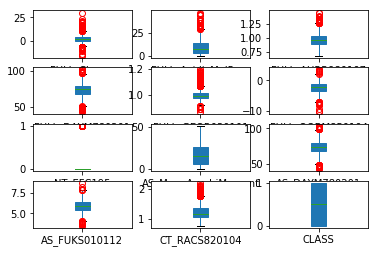

In [65]:
# Box and whisker plots
# This gives a visual of the median, the range between 25% and 75% quartiles, and the outliers on the whiskers 
plt.figure(figsize=(15,15))
c = "red"
a = "green"
train.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, patch_artist=True,boxprops=dict(facecolor=a, color=a),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c))

plt.show()

## **12. Multivariate data visualization**
- Differing from univariate,this shows how each attribute is correlated with other attributes in the dataset

### Correlation matrix 

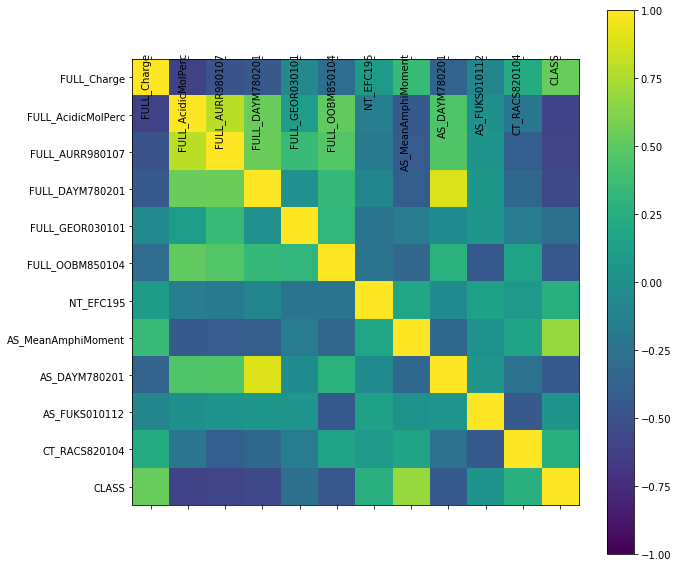

In [64]:
# plot a correlation matrix across the train dataset.
# this displays a heatmap that shows how each attribute is correlated with the other in the dataset
correlations = train.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train.columns)
ax.set_yticklabels(train.columns)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor",)
plt.show()

## **13. Data preparation**

## Standardizing the train data
- This is done so that all the values of the attributes assume a guasian distribution.

In [20]:
#Standardizing the data.
from sklearn.preprocessing import StandardScaler
array = train.values
# Separate the array into input and output componets
x = array[:,0:11]
y = array[:,11]
scaler = StandardScaler().fit(x)
standardizedX = scaler.transform(x)
# summurized transformed data
np.set_printoptions(precision=3)
print(standardizedX[0:5,:])

[[ 7.697e-01 -1.123e+00 -1.900e-01  1.376e-01 -6.067e-01 -7.206e-01
  -3.117e-01 -1.331e+00 -2.257e-02 -3.610e-01 -9.251e-01]
 [ 5.079e-01 -4.109e-01 -3.763e-01 -2.432e-01 -1.181e+00 -9.245e-01
   3.208e+00 -1.303e+00 -5.924e-01  9.021e-01  1.037e+00]
 [ 9.006e-01 -4.109e-01 -9.163e-01 -8.651e-03 -1.054e+00 -4.632e-02
  -3.117e-01 -1.304e+00 -4.590e-01 -1.409e+00  2.318e+00]
 [ 7.697e-01 -5.741e-01 -7.115e-01 -8.701e-01  1.594e-01  6.274e-01
  -3.117e-01 -1.302e+00 -7.015e-01 -2.300e+00  6.989e-01]
 [ 1.424e+00  2.041e-03 -3.670e-01 -1.050e+00 -4.790e-01  2.003e-01
  -3.117e-01 -1.302e+00 -7.713e-02 -1.977e+00  1.447e+00]]


## Rescaling the train dataset
- This is done so that all the values of the attributes range between 0 -1 . this saves the smaller values from being affected by the bigger values.

In [21]:
#Rescaling the data.
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = train.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,11]
scaler = MinMaxScaler(feature_range=(0, 1))
rescalledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescalledX[0:5,:])

[[0.457 0.    0.348 0.545 0.33  0.483 0.    0.005 0.508 0.415 0.182]
 [0.435 0.116 0.322 0.489 0.276 0.458 1.    0.011 0.421 0.586 0.475]
 [0.467 0.116 0.246 0.523 0.288 0.565 0.    0.011 0.442 0.273 0.666]
 [0.457 0.089 0.275 0.399 0.403 0.647 0.    0.011 0.405 0.153 0.424]
 [0.511 0.183 0.323 0.373 0.342 0.595 0.    0.011 0.5   0.196 0.536]]


## Normalizing the train dataset
- Normalization is done to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.


In [22]:
from sklearn.preprocessing import Normalizer

array = train.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,11]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])
print(type(normalizedX))#print the data type so we can know what we are 
#working with in the dataset.

[[ 0.048  0.     0.009  0.711  0.009 -0.035  0.     0.003  0.698  0.054
   0.01 ]
 [ 0.04   0.054  0.009  0.72   0.01  -0.04   0.01   0.006  0.686  0.066
   0.015]
 [ 0.054  0.053  0.009  0.724  0.009 -0.025  0.     0.006  0.683  0.049
   0.017]
 [ 0.053  0.044  0.009  0.699  0.011 -0.014  0.     0.006  0.71   0.046
   0.015]
 [ 0.076  0.087  0.009  0.658  0.01  -0.021  0.     0.006  0.742  0.046
   0.016]]
<class 'numpy.ndarray'>


* ## Feature selection
- I did this step so as to automatically choose the attributes which will offer the best prediction.
- In this step i expect that some features may be discarded.
- This stage is important because less data reduces overfitting and the training time,yet it increases the prediction accuracy

## Recursive feature elimination
- This method recursively removes attributes and building a model on the attributes that remain. 
- RFE uses the model accuracy to identify those attributes which contribute the most to predicting the target attribute.
- I also noted that i can set different models for recursive feature elimination.

In [23]:
# Recursive feature elimination using the LogisticRegression model.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = train.values
X = rescalledX[:,0:11]
Y = array[:,11]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5) # select the best 5 attributes.
fit = rfe.fit(X, Y)
print("Num Features: ",  fit.n_features_)
print("Selected Features:",  fit.support_)
print("Feature Ranking: ",  fit.ranking_)

print(train.columns[fit.get_support(indices=True)])
selected = train.loc[:,(train.columns[fit.get_support(indices=True)])]
print(selected)

Num Features:  5
Selected Features: [ True  True False  True  True False False  True False False False]
Feature Ranking:  [1 1 3 1 1 2 4 1 6 7 5]
Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_DAYM780201',
       'FULL_GEOR030101', 'AS_MeanAmphiMoment'],
      dtype='object')
      FULL_Charge  FULL_AcidicMolPerc  FULL_DAYM780201  FULL_GEOR030101  \
0             5.0               0.000           74.842            0.975   
1             4.0               5.405           71.595            0.957   
2             5.5               5.405           73.595            0.961   
3             5.0               4.167           66.250            0.999   
4             7.5               8.537           64.720            0.979   
...           ...                 ...              ...              ...   
3033          1.0               5.263           67.947            1.006   
3034         -6.5              21.667           75.433            1.015   
3035         -1.5              12.500        

## Comparing mutiple classification algorithms with rescaled Data
- This helps to determine the performance of multiple algorithms on the same train dataset. it gives an overview on which algo is best for the problem.

('LR', 0.9134206183776271, 0.018373095588636527)
('LDA', 0.9186935469862776, 0.016466147460455934)
('KNN', 0.925614469341671, 0.016958294314786942)
('CART', 0.9068481848184818, 0.01348221733618707)
('NB', 0.9193546986277574, 0.0227548320695639)
('SVM', 0.9328447976376586, 0.018291327116532134)


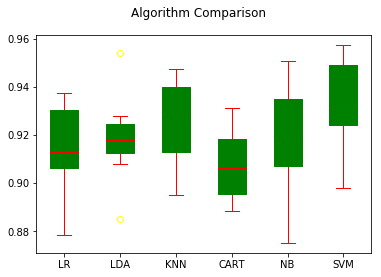

In [71]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

#split the dataset 
X = rescalledX[:,0:11]
Y = array[:,11]

# prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10,random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
c = "red"
a = "green"
d = "yellow"
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results, patch_artist=True,boxprops=dict(facecolor=a, color=a),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=d),medianprops=dict(color=c))
ax.set_xticklabels(names)
pyplot.show()

## Comparing multiple algorithms with standardized data

('LR', 0.9180334809796769, 0.016437961517351062)
('LDA', 0.9186935469862776, 0.016466147460455934)
('KNN', 0.926268021538996, 0.017353096536560104)
('CART', 0.9022396647559493, 0.013954724260337085)
('NB', 0.9193546986277574, 0.0227548320695639)
('SVM', 0.9377866076081294, 0.01712709999836976)


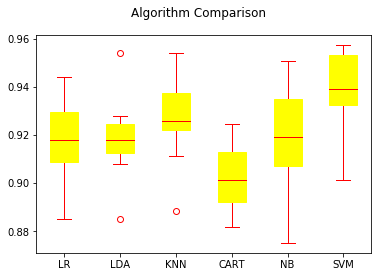

In [68]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
array = train.values
#split the dataset 
X = standardizedX[:,0:11]
Y = array[:,11]

# prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10,random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
c = "red"
a = "yellow"
d = "blue"
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results, patch_artist=True,boxprops=dict(facecolor=a, color=a),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c))
ax.set_xticklabels(names)
pyplot.show()

## Comparing multiple algorithms using normalized data

('LR', 0.8870983150946673, 0.01597238721350432)
('LDA', 0.9052001910717389, 0.018009503919343053)
('KNN', 0.9134325603612995, 0.024610336289473577)
('CART', 0.8926958485322217, 0.019286584585612273)
('NB', 0.9167263765850269, 0.017010876111678355)
('SVM', 0.8989469341671009, 0.01604909195908454)


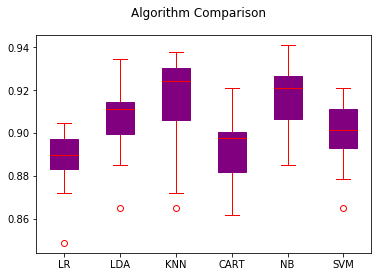

In [69]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
array = train.values
#split the dataset 
X = normalizedX[:,0:11]
Y = array[:,11]

# prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10,random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
c = "red"
a = "purple"
d = "yellow"
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results, patch_artist=True,boxprops=dict(facecolor=a, color=a),capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c))
ax.set_xticklabels(names)
pyplot.show()

`From the above comparisions, rescaled data provided a better accuracy across multiple algorithms`

 ## Rescaling the test_dataset
- I also rescaled the test_dataset because i developed the models using rescaled train dataset, 
- i.e the transformations done on the train dataset should also be done on the test dataset.

In [27]:
#Rescaling the test_data.
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = test.values
# separate array into input and output components
x = array[:,0:11]
scaler = MinMaxScaler(feature_range=(0, 1))
rescalled_test = scaler.fit_transform(x)
# summarize transformed data
set_printoptions(precision=3)
print(rescalled_test[0:5,:])

[[0.395 0.084 0.238 0.474 0.334 0.305 0.    0.006 0.493 0.903 0.273]
 [0.395 0.101 0.264 0.276 0.143 0.736 0.    0.005 0.162 0.293 0.702]
 [0.349 0.    0.276 0.    0.512 0.221 0.    0.002 0.    0.568 0.231]
 [0.407 0.    0.232 0.397 0.317 0.246 0.    0.039 0.397 0.432 0.206]
 [0.209 0.489 0.495 0.441 0.297 0.592 0.    0.054 0.34  0.464 0.424]]


 ## Generating the model using Gausian/Naive_Bayes with rescaled data
 - Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature

In [28]:
# using naive_bayes

from sklearn.naive_bayes import GaussianNB
array = train.values

# splitting the train dataset
X = rescalledX[:,0:11]
Y = array[:,11]

# Resampling the train dataset using kfold spli
kfold = KFold(n_splits=10,random_state=7, shuffle=True)
model = GaussianNB()  # Using naive bayes

# fitting the model
model.fit(X,Y)

# predicting the test_dataset using the model
Class= model.predict(rescalled_test[:,0:11])

#Returning the Naive Bayes output in a dataframe
report = pd.DataFrame(Class)

report.columns=['CLASS'] # Creating a class column
report.index.name='Index' #Creating a culumn index

# Map function to change the 0.0 and 1.0 into False and True repectively
report['CLASS']= report['CLASS'].map({0.0:False, 1.0:True})
report

#Storing the dataframe output in a csv file.
report.to_csv("predicted_outcome.csv")



## Generating the model using the Logistic Regression with rescalled data

In [29]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = train.values
X = rescalledX[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model1 = LogisticRegression()
# fitting the model
model1.fit(X,Y)

Class1= model1.predict(rescalled_test)

#Returning the LR output in a dataframe
report1 = pd.DataFrame(Class1)

report1.columns=['CLASS'] # Creating a class column
report1.index.name='Index' #Creating a culumn index

# Map function to change the 0.0 and 1.0 into False and True repectively
report1['CLASS']= report1['CLASS'].map({0.0:False, 1.0:True})
report1

#Storing the dataframe output in a csv file.
report1.to_csv("model1.csv")


## Generating the model using Stochastic Gradient Descent

In [30]:
## Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

array = train.values
X = rescalledX[:,0:11]
Y = array[:,11]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model2 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

# fitting the model
model2.fit(X,Y)

Classl2= model2.predict(rescalled_test)

#Returning the LR output in a dataframe
report2 = pd.DataFrame(Class1)

report2.columns=['CLASS'] # Creating a class column
report2.index.name='Index' #Creating a culumn index

# Map function to change the 0.0 and 1.0 into False and True repectively
report2['CLASS']= report2['CLASS'].map({0.0:False, 1.0:True})
report2

#Storing the dataframe output in a csv file.
report2.to_csv("predicted_outcome2.csv")

## Generating a model using VotingClassifier algorithm
- This is done to combine the prediction from different algorithms

In [31]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

array = train.values
X = rescalledX[:,0:11]
Y = array[:,11]
kfold = KFold(n_splits=10,random_state=7, shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

model4 = XGBClassifier()
estimators.append(('xgb', model4))

model5 = RandomForestClassifier()
estimators.append(('rfc', model5))

# create the ensemble model
model3 = VotingClassifier(estimators)
# fitting the model
model3.fit(X,Y)

Class3= model3.predict(rescalled_test)

#Returning the LR output in a dataframe
report3 = pd.DataFrame(Class3)

report3.columns=['CLASS'] # Creating a class column
report3.index.name='Index' #Creating a culumn index

# Map function to change the 0.0 and 1.0 into False and True repectively
report3['CLASS']= report3['CLASS'].map({0.0:False, 1.0:True})
report3

#Storing the dataframe output in a csv file.
report3.to_csv("predicted_outcome3.csv")

## Generating a model using Neural Networks with MLPclassifier

In [32]:
## MLPClassifier
from sklearn.neural_network import MLPClassifier
array = train.values

# splitting the training dataset
X = rescalledX[:,0:11] # training attributes
Y = array[:,11] # training outcome

# using the Kfold
num_folds = 10
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model8 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

# fitting the model
model8.fit(X,Y)

#Asighning the class outcome into the variable named Class8
Class8= model8.predict(rescalled_test[:,0:11])

#Returning the LR output in a dataframe
report8 = pd.DataFrame(Class8)

report8.columns=['CLASS'] # Creating a class column
report8.index.name='Index' #Creating a culumn index

# Map function to change the 0.0 and 1.0 into False and True repectively
report8['CLASS']= report8['CLASS'].map({0.0:False, 1.0:True})
report8

#Storing the dataframe output in a csv file.
report8.to_csv("prediced_outcome8.csv")

## Generating a model using Linear Discriminant Analysis

In [33]:
# using Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
array = train.values
X = rescalledX[:,0:11]
Y = array[:,11]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

model7 = LinearDiscriminantAnalysis()

# fitting the model
model7.fit(X_train, Y_train) 

# Print the mathew's corelation coefficient result of the algorithm
predicted = model7.predict(X_test)
print('MCC: ', matthews_corrcoef(model7.predict(X_test),Y_test))

# print the confusion matrix of the algorithm
from sklearn.metrics import confusion_matrix
print('confusion matrix:', confusion_matrix( model7.predict(X_test), Y_test))

# predicting the test_dataset using the model
Class7= model7.predict(rescalled_test[:,0:11])

#Returning the Linear Discriminnat Analysis output in a dataframe
report7 = pd.DataFrame(Class7)

report7.columns=['CLASS'] # Creating a class column
report7.index.name='Index' #Creating a culumn index

# Map function to change the 0.0 and 1.0 into False and True repectively
report7['CLASS']= report7['CLASS'].map({0.0:False, 1.0:True})
report7

#Storing the dataframe output in a csv file.
report7.to_csv("Predicted_outcome7.csv")



MCC:  0.8394003381204443
confusion matrix: [[470  52]
 [ 29 452]]


## Generating a model using K Nearest Neighbour algorithm

In [74]:
# K Nearest Neighbour algorithm
from sklearn.neighbors import KNeighborsClassifier

array = train.values

# spliting the train dataset
X = rescalledX[:,0:11] 
Y = array[:,11]

# Resample using Kfold
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

# use the KNeighboursClassifier algorithm
model3 = KNeighborsClassifier()

# fitting the model
model3.fit(X_train, Y_train)

#print the results
# Print the mathew's corelation coefficient result of the algorithm
predicted = model3.predict(X_test)
print('MCC: ', matthews_corrcoef(model3.predict(X_test),Y_test))

# Using the model to predict the outcome class
Class3= model3.predict(rescalled_test)

#Returning the LR output in a dataframe
report3 = pd.DataFrame(Class3)

report3.columns=['CLASS'] # Creating a class column
report3.index.name='Index' #Creating a culumn index

# Map function to change the 0.0 and 1.0 into False and True repectively
report3['CLASS']= report3['CLASS'].map({0.0:False, 1.0:True})
report3

#Storing the dataframe output in a csv file.
report3.to_csv("predicted_outcome4.csv")

MCC:  0.837243049887755


## Generating a model using Support Vector Machine
- Support Vector Machines seek a line that best separates two classes.

In [35]:
from sklearn.svm import SVC

array = train.values

# Splitting the dataset
X = rescalledX[:,0:11]
Y = array[:,11]

# Resample the data using train test split method
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

# develop the model using support vector machine
model3 = SVC()

# Print the mathew's corelation coefficient result of the algorithm
predicted = model.predict(X_test)
print('MCC: ', matthews_corrcoef(model.predict(X_test),Y_test))

# print the confusion matrix of the algorithm
from sklearn.metrics import confusion_matrix
print('confusion matrix:', confusion_matrix( model.predict(X_test), Y_test))

# fitting the model
model3.fit(X,Y)

Class3= model3.predict(rescalled_test)

#Returning the LR output in a dataframe
report3 = pd.DataFrame(Class3)

report3.columns=['CLASS'] # Creating a class column
report3.index.name='Index' #Creating a culumn index

# Map function to change the 0.0 and 1.0 into False and True repectively
report3['CLASS']= report3['CLASS'].map({0.0:False, 1.0:True})
report3

#Storing the dataframe output in a csv file.
report3.to_csv("model5.csv")

MCC:  0.8327367716500894
confusion matrix: [[453  48]
 [ 36 466]]


##  Generating a model using Classification and regression tree algorithm

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef
array = train.values
X = rescalledX[:,0:11]
Y = array[:,11]
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
print('MCC: ', matthews_corrcoef(model.predict(X_test),Y_test))

MCC:  0.7805121269555714


## Generating Naive bayes model 

In [37]:
# using naive_bayes

from sklearn.naive_bayes import GaussianNB
array = train.values

# split the train dataset
X = rescalledX[:,0:11]
Y = array[:,11]

#Resample the train dataset using Kfold split
test_size = 0.33
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

model = GaussianNB()  # Using naive bayes

model.fit(X_train, Y_train) # fitting the model

# predicting the test_dataset using the model
Class= model.predict(rescalled_test[:,0:11])

#Returning the Naive Bayes output in a dataframe
report = pd.DataFrame(Class)

report.columns=['CLASS'] # Creating a class column
report.index.name='Index' #Creating a culumn index

# Map function to change the 0.0 and 1.0 into False and True repectively
report['CLASS']= report['CLASS'].map({0.0:False, 1.0:True})
report

#Storing the dataframe output in a csv file.
report.to_csv("predicted_outcome1.csv")

# Print the mathew's corelation coefficient result of the algorithm
predicted = model.predict(X_test)
print('MCC: ', matthews_corrcoef(model.predict(X_test),Y_test))

# print the confusion matrix of the algorithm
from sklearn.metrics import confusion_matrix
print('confusion matrix:', confusion_matrix( model.predict(X_test), Y_test))

MCC:  0.8367260489198274
confusion matrix: [[454  47]
 [ 35 467]]


## REFERENCES;
- Feurer, M., Klein, A., Eggensperger, K., Springenberg, J. T., Blum, M., & Hutter, F. (2019). Auto-sklearn: efficient and robust automated machine learning. In Automated Machine Learning (pp. 113-134). Springer, Cham.
- Mukherjee, S., & Sharma, N. (2012). Intrusion detection using naive Bayes classifier with feature reduction. Procedia Technology, 4, 119-128.
- Thabtah, F., Abdelhamid, N., & Peebles, D. (2019). A machine learning autism classification based on logistic regression analysis. Health information science and systems, 7(1), 12.
- Chatterjee, S., Dey, D., & Munshi, S. (2019). Integration of morphological preprocessing and fractal based feature extraction with recursive feature elimination for skin lesion types classification. Computer methods and programs in biomedicine, 178, 201-218.
- Schmidtler, Mauritius AR, and Roland Borrey. "Data classification methods using machine learning techniques." U.S. Patent No. 7,937,345. 3 May 2011.